✅ Libraries imported successfully
✅ Data loaded successfully
Dataset shape: (392692, 16)
Total records: 392,692
Unique customers: 4,338
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Total revenue: $8,887,208.89
Monthly Sales Summary:
--------------------------------------------------
      Month  Total_Revenue  Number_of_Transactions  Avg_Transaction_Value
0   2010-12      570422.73                   25670                  22.22
1   2011-01      568101.31                   20988                  27.07
2   2011-02      446084.92                   19706                  22.64
3   2011-03      594081.76                   26870                  22.11
4   2011-04      468374.33                   22433                  20.88
5   2011-05      677355.15                   28073                  24.13
6   2011-06      660046.05                   26926                  24.51
7   2011-07      598962.90                   26580                  22.53
8   2011-08      644051.04              

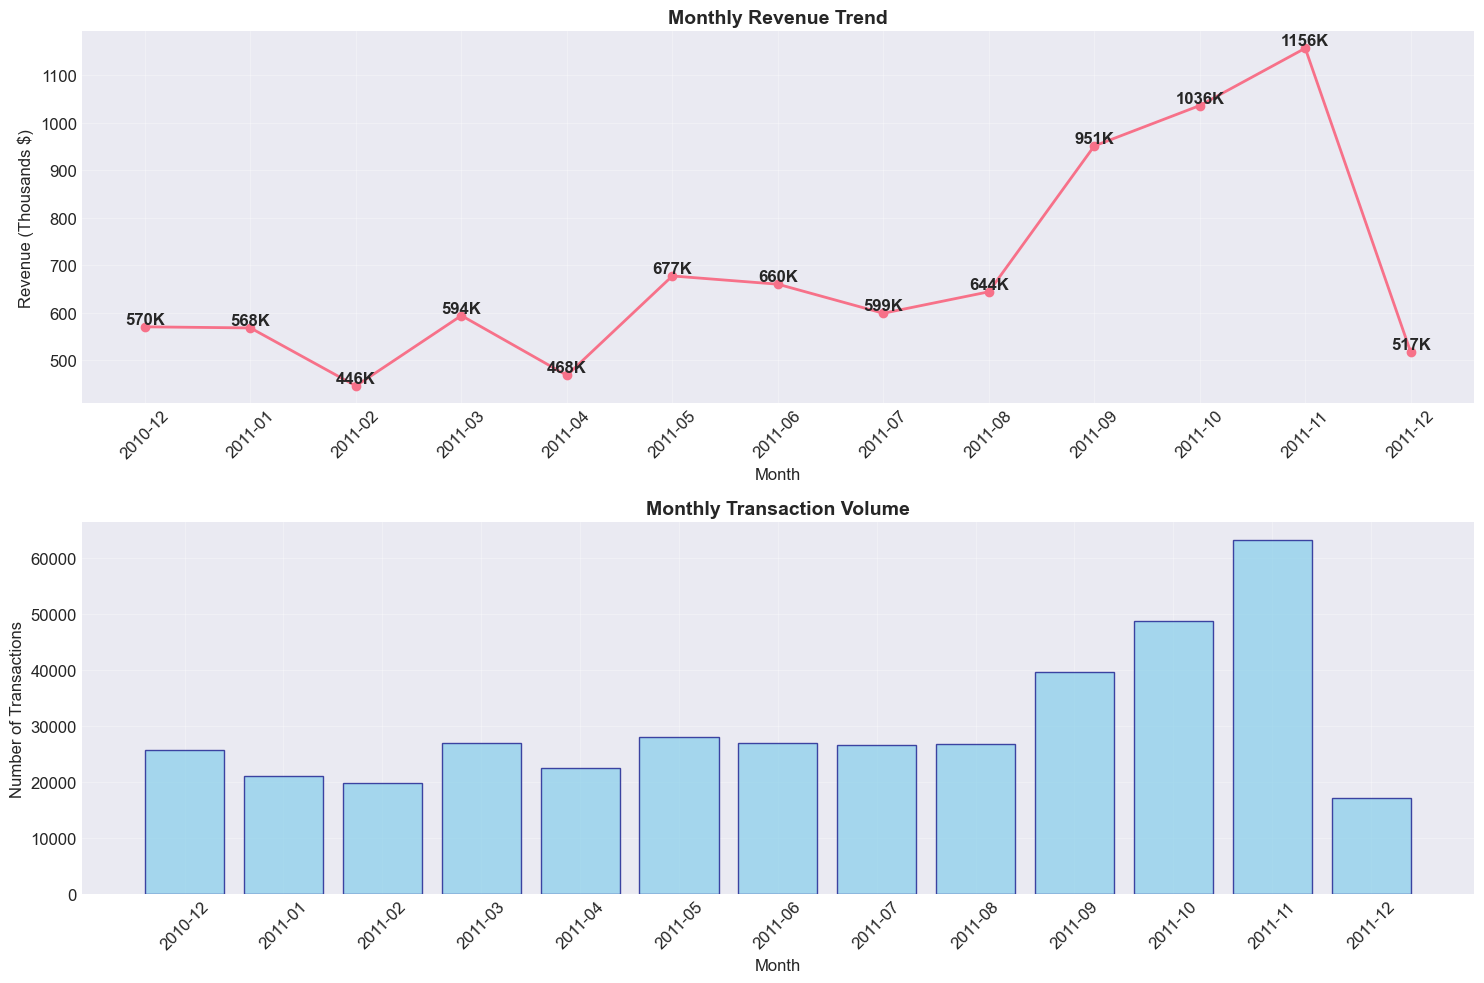

📊 KEY SALES METRICS
Total Revenue: $8,887,208.89
Total Orders: 18,532
Average Order Value: $479.56
Average Items per Order: 278.0
Average Daily Revenue: $29,138.39


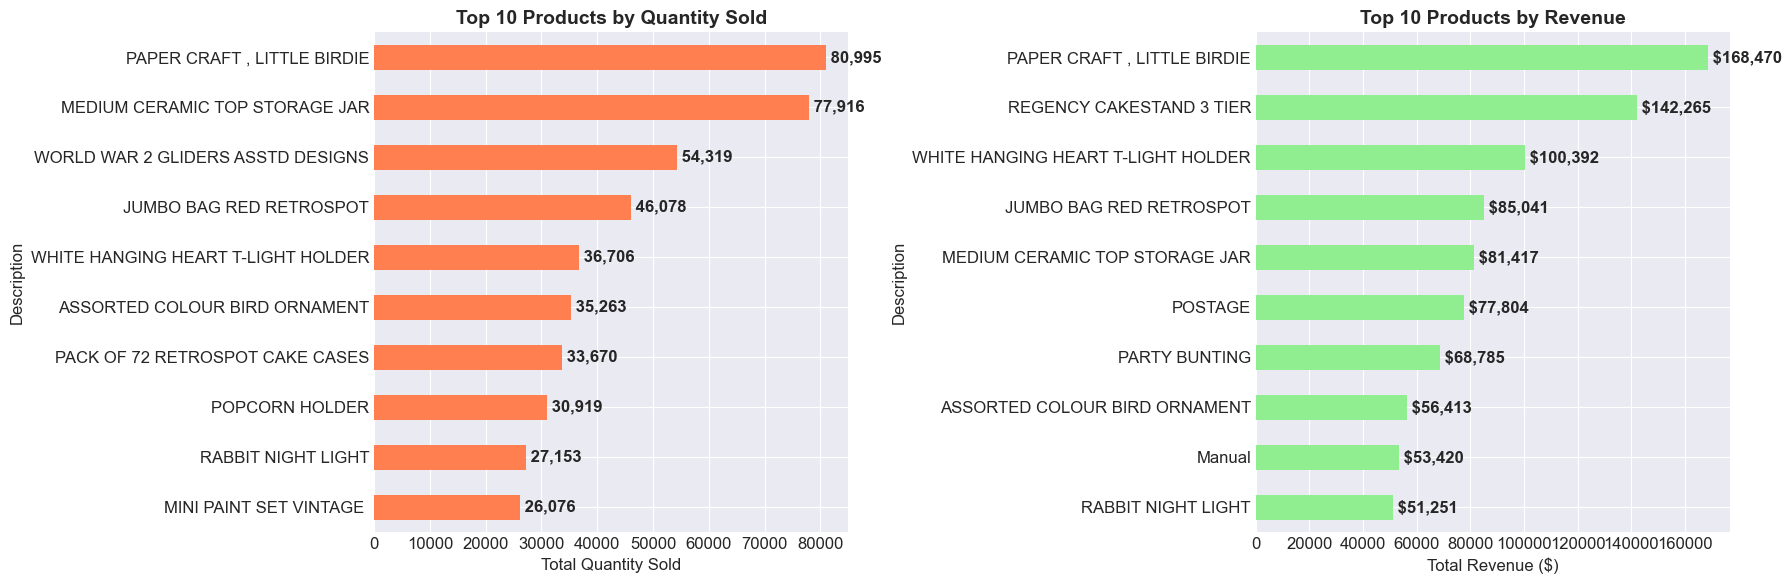


🏆 TOP 5 PRODUCTS BY REVENUE:
--------------------------------------------------
1. PAPER CRAFT , LITTLE BIRDIE... - $168,469.60
2. REGENCY CAKESTAND 3 TIER... - $142,264.75
3. WHITE HANGING HEART T-LIGHT HOLDER... - $100,392.10
4. JUMBO BAG RED RETROSPOT... - $85,040.54
5. MEDIUM CERAMIC TOP STORAGE JAR... - $81,416.73


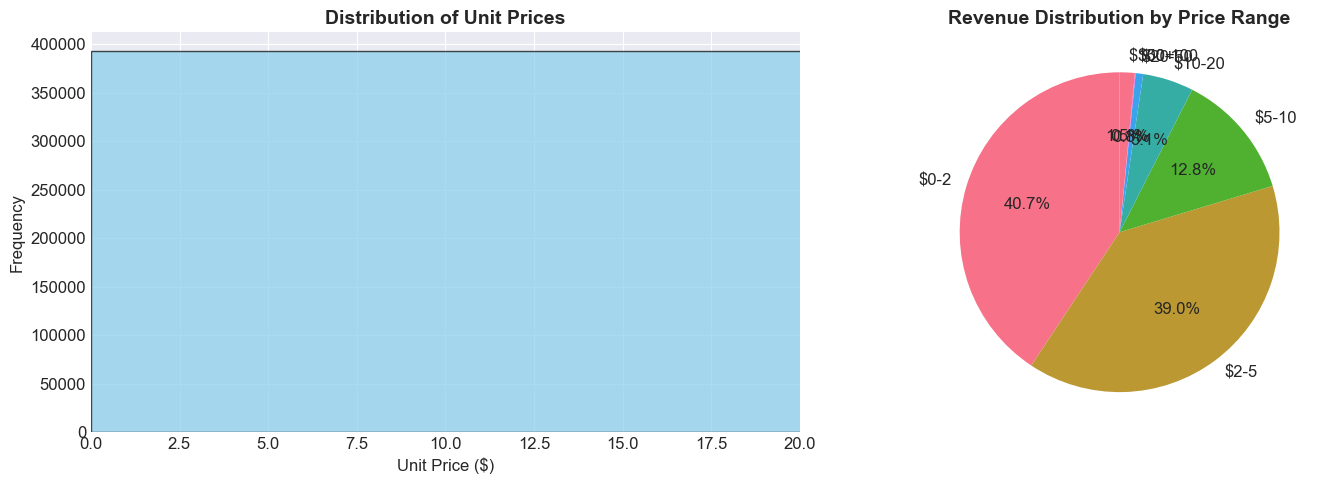

🌍 TOP 10 COUNTRIES BY REVENUE
                Total_Revenue  Transactions  Avg_Transaction_Value  \
Country                                                              
United Kingdom     7285024.64        349203                  20.86   
Netherlands         285446.34          2359                 121.00   
EIRE                265262.46          7226                  36.71   
Germany             228678.40          9025                  25.34   
France              208934.31          8326                  25.09   
Australia           138453.81          1181                 117.23   
Spain                61558.56          2479                  24.83   
Switzerland          56443.95          1841                  30.66   
Belgium              41196.34          2031                  20.28   
Sweden               38367.83           450                  85.26   

                Revenue_Share_%  
Country                          
United Kingdom            81.97  
Netherlands                

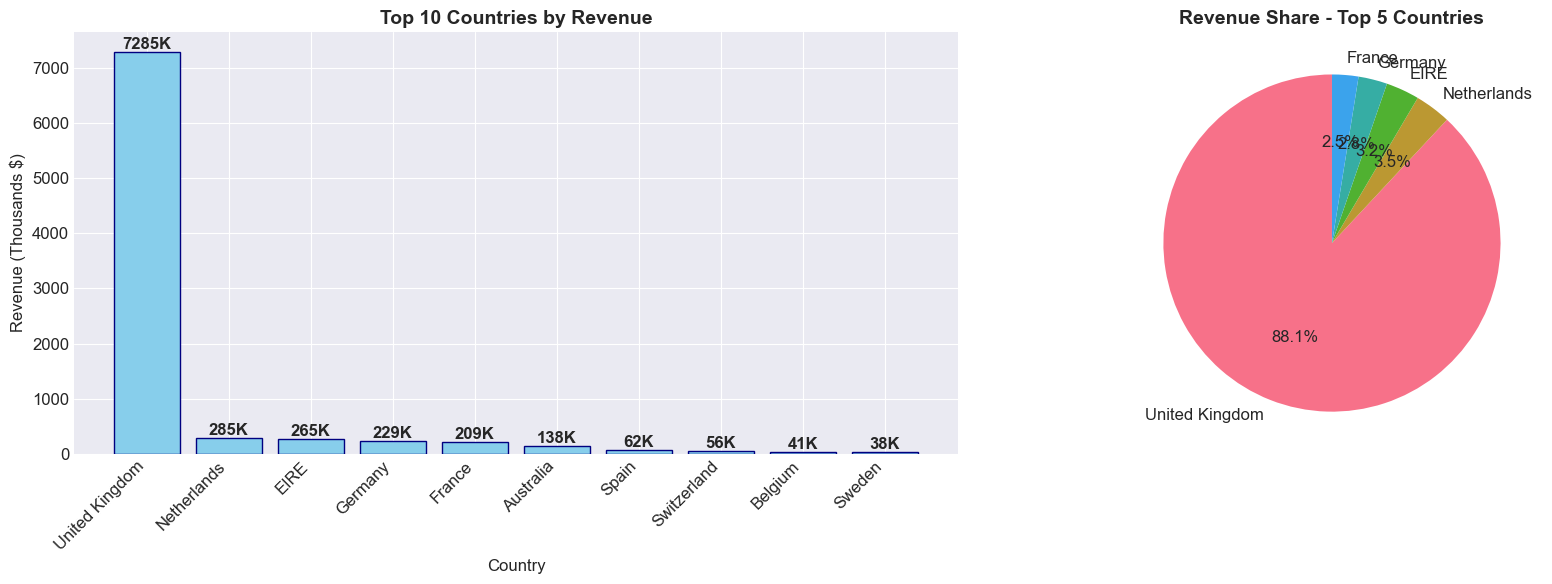

📊 CUSTOMER METRICS SUMMARY
Average purchase frequency: 4.3 orders
Average customer lifetime value: $2,048.69
Median customer value: $668.57
Max customer value: $280,206.02


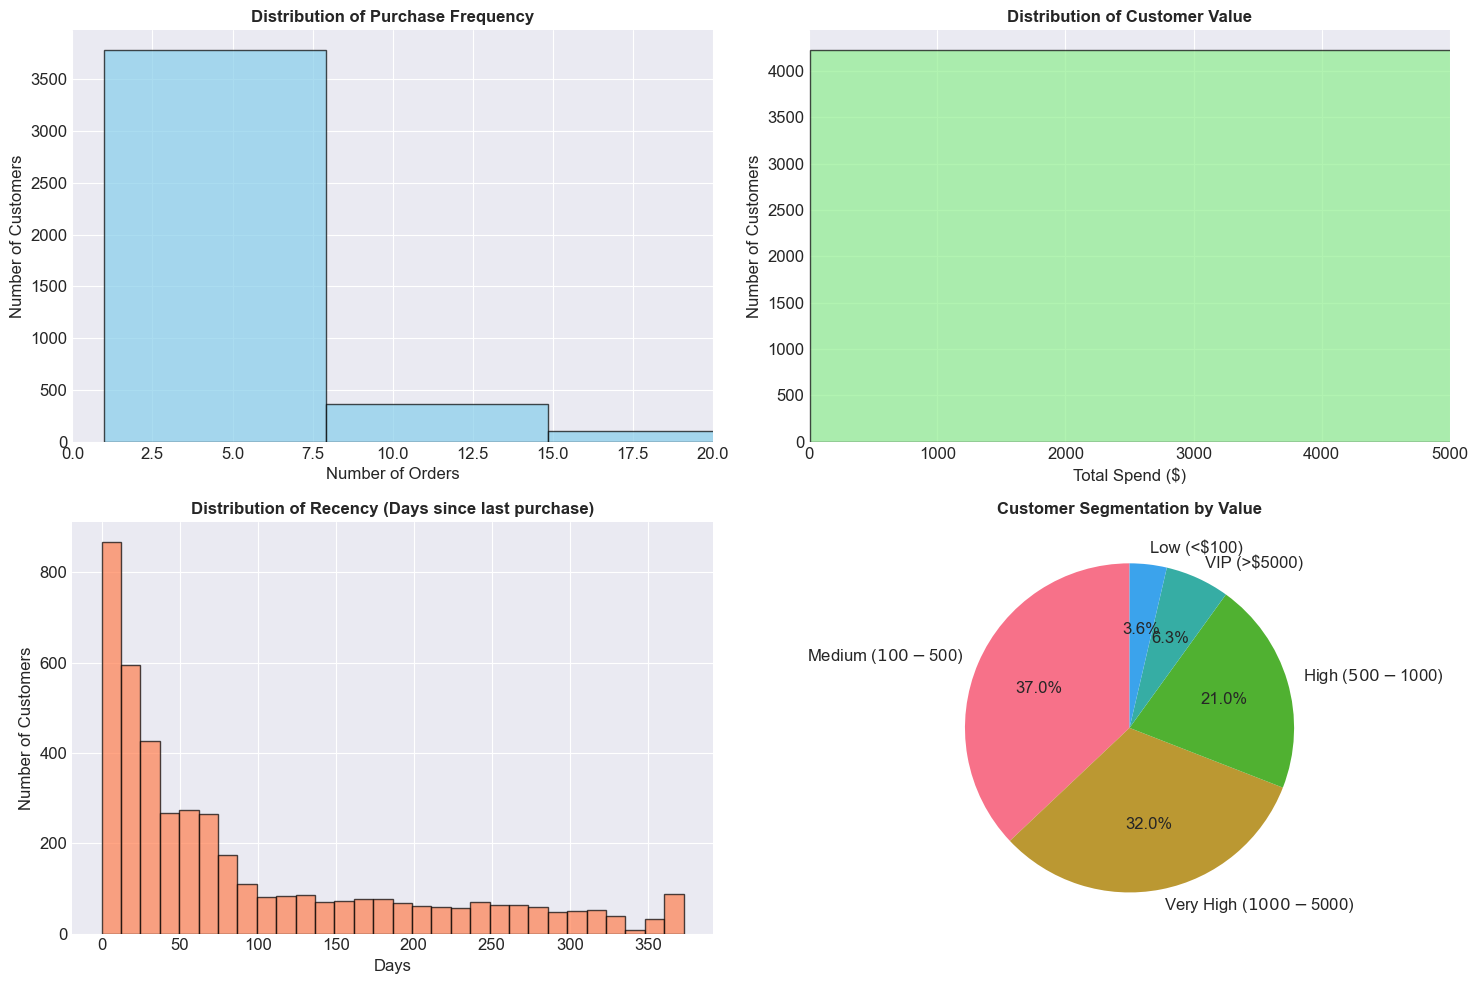

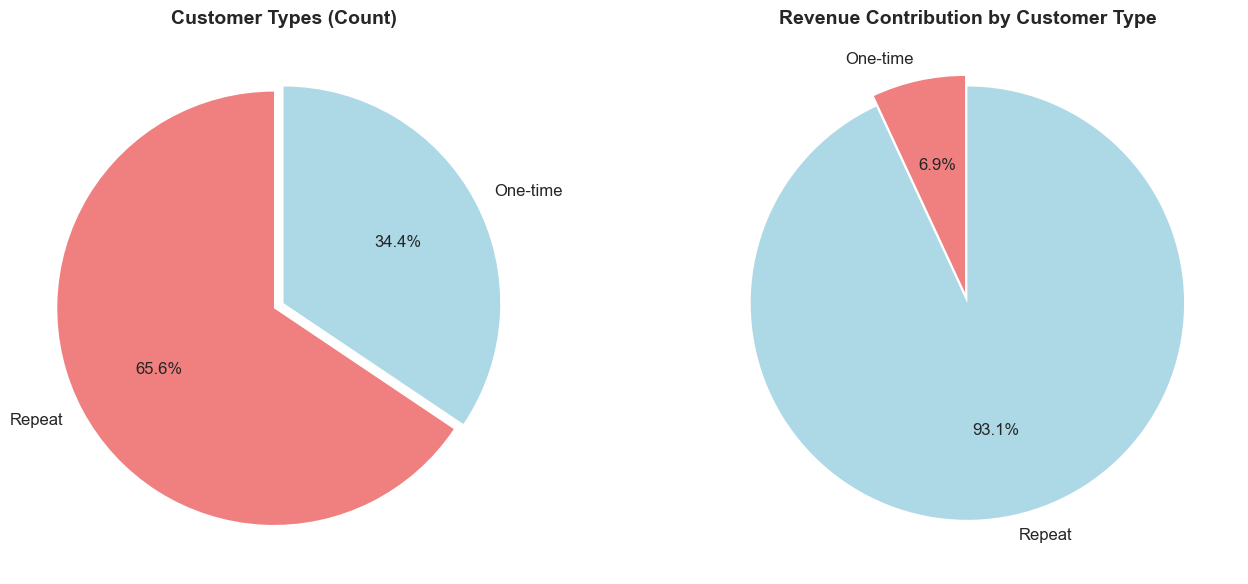


📊 CUSTOMER TYPE ANALYSIS
One-time customers: 1,493 (34.4%)
Repeat customers: 2,845 (65.6%)

Revenue from one-time customers: $613,989.56
Revenue from repeat customers: $8,273,219.33


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (6,).

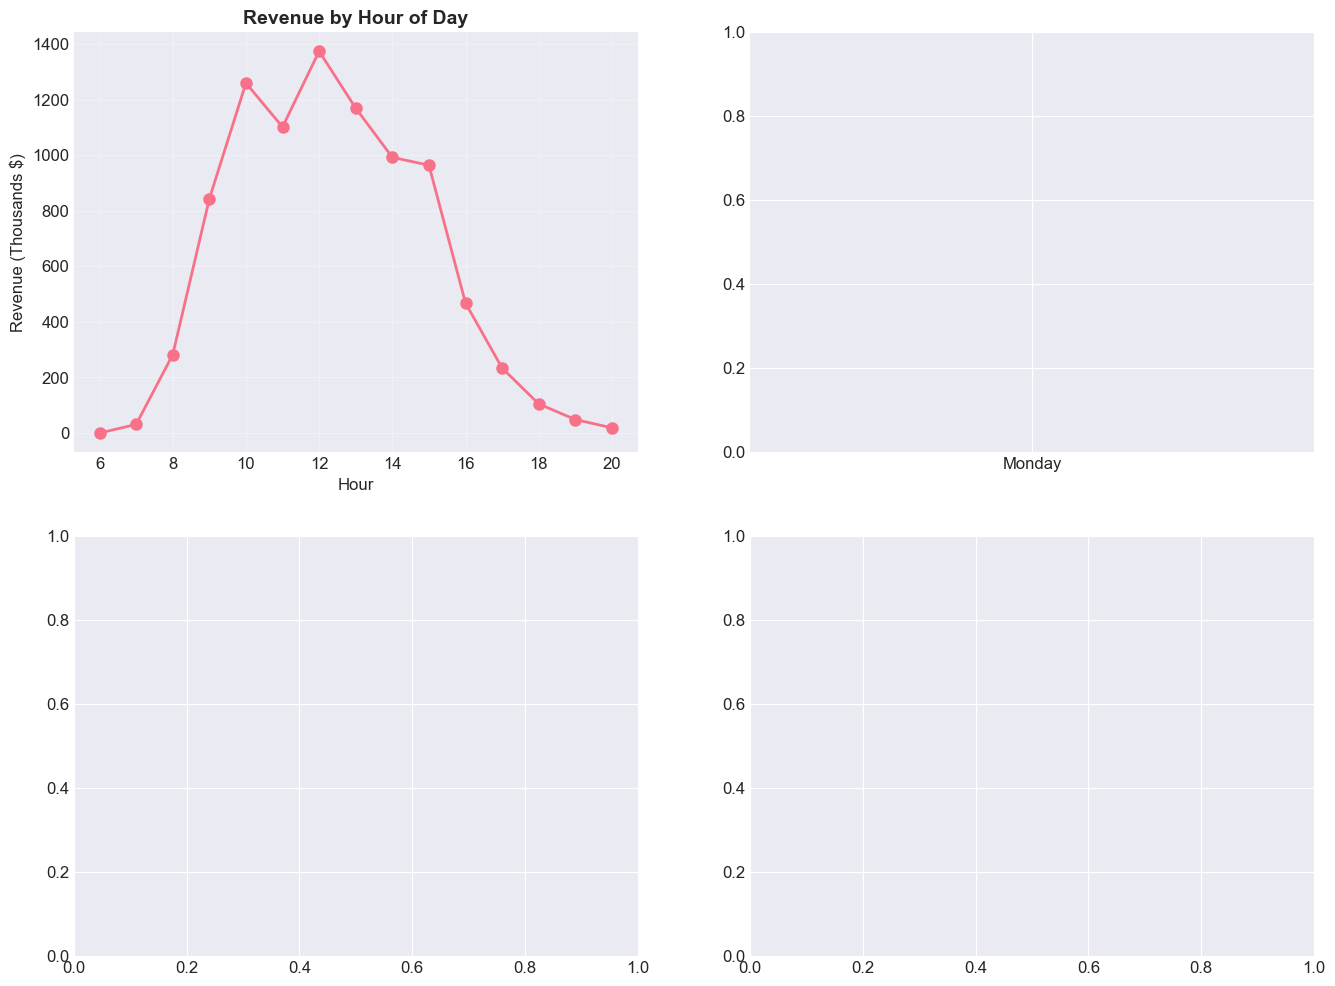

In [1]:
# %% [markdown]
# # Step 2: Exploratory Data Analysis (EDA)
# ## Understanding Customer Behavior and Sales Patterns

# %% [markdown]
# ### Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully")

# %% [markdown]
# ### Load Cleaned Data

# %%
# Load the cleaned dataset from Step 1
df = pd.read_csv('../data/processed/online_retail_cleaned.csv')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(f"✅ Data loaded successfully")
print(f"Dataset shape: {df.shape}")
print(f"Total records: {len(df):,}")
print(f"Unique customers: {df['CustomerID'].nunique():,}")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Total revenue: ${df['TotalRevenue'].sum():,.2f}")

# %% [markdown]
# ## SECTION 1: SALES OVERVIEW

# %% [markdown]
# ### 1.1 Monthly Sales Trend

# %%
# Monthly sales aggregation
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalRevenue'].agg(['sum', 'count', 'mean']).reset_index()
monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].astype(str)

# Rename columns
monthly_sales.columns = ['Month', 'Total_Revenue', 'Number_of_Transactions', 'Avg_Transaction_Value']

print("Monthly Sales Summary:")
print("-" * 50)
print(monthly_sales.round(2))

# %%
# Plot monthly sales trend
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Monthly Revenue
axes[0].plot(monthly_sales['Month'], monthly_sales['Total_Revenue']/1000, marker='o', linewidth=2, markersize=6)
axes[0].set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue (Thousands $)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Add value labels on points
for i, v in enumerate(monthly_sales['Total_Revenue']/1000):
    axes[0].text(i, v, f'{v:.0f}K', ha='center', va='bottom', fontweight='bold')

# Plot 2: Number of Transactions
axes[1].bar(monthly_sales['Month'], monthly_sales['Number_of_Transactions'], color='skyblue', edgecolor='navy', alpha=0.7)
axes[1].set_title('Monthly Transaction Volume', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Transactions')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ### 1.2 Key Sales Insights

# %%
# Calculate key metrics
total_revenue = df['TotalRevenue'].sum()
avg_order_value = df.groupby('InvoiceNo')['TotalRevenue'].sum().mean()
total_orders = df['InvoiceNo'].nunique()
avg_items_per_order = df.groupby('InvoiceNo')['Quantity'].sum().mean()

print("📊 KEY SALES METRICS")
print("=" * 50)
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Average Items per Order: {avg_items_per_order:.1f}")
print(f"Average Daily Revenue: ${df.groupby(df['InvoiceDate'].dt.date)['TotalRevenue'].sum().mean():,.2f}")

# %% [markdown]
# ## SECTION 2: PRODUCT ANALYSIS

# %% [markdown]
# ### 2.1 Top 10 Best Selling Products

# %%
# Top products by quantity sold
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top products by revenue
top_products_revenue = df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Top products by quantity
top_products_qty.plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Quantity Sold')
axes[0].invert_yaxis()

# Add value labels
for i, v in enumerate(top_products_qty.values):
    axes[0].text(v, i, f' {v:,}', va='center', fontweight='bold')

# Plot 2: Top products by revenue
top_products_revenue.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Revenue ($)')
axes[1].invert_yaxis()

# Add value labels
for i, v in enumerate(top_products_revenue.values):
    axes[1].text(v, i, f' ${v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🏆 TOP 5 PRODUCTS BY REVENUE:")
print("-" * 50)
for i, (product, revenue) in enumerate(top_products_revenue.head(5).items(), 1):
    print(f"{i}. {product[:50]}... - ${revenue:,.2f}")

# %% [markdown]
# ### 2.2 Price Distribution Analysis

# %%
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Price distribution
axes[0].hist(df['UnitPrice'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Unit Prices', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Unit Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 20)  # Focus on common price range

# Revenue distribution by price range
price_bins = [0, 2, 5, 10, 20, 50, 100, float('inf')]
price_labels = ['$0-2', '$2-5', '$5-10', '$10-20', '$20-50', '$50-100', '$100+']
df['PriceRange'] = pd.cut(df['UnitPrice'], bins=price_bins, labels=price_labels)
price_range_revenue = df.groupby('PriceRange')['TotalRevenue'].sum()

axes[1].pie(price_range_revenue.values, labels=price_range_revenue.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Revenue Distribution by Price Range', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## SECTION 3: GEOGRAPHIC ANALYSIS

# %% [markdown]
# ### 3.1 Country-wise Revenue Analysis

# %%
# Revenue by country
country_revenue = df.groupby('Country')['TotalRevenue'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False)
country_revenue.columns = ['Total_Revenue', 'Transactions', 'Avg_Transaction_Value']
country_revenue['Revenue_Share_%'] = (country_revenue['Total_Revenue'] / country_revenue['Total_Revenue'].sum() * 100).round(2)

print("🌍 TOP 10 COUNTRIES BY REVENUE")
print("=" * 60)
print(country_revenue.head(10).round(2))

# %%
# Visualize top countries
top_countries = country_revenue.head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot for top countries
axes[0].bar(range(len(top_countries)), top_countries['Total_Revenue']/1000, color='skyblue', edgecolor='navy')
axes[0].set_title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Revenue (Thousands $)')
axes[0].set_xticks(range(len(top_countries)))
axes[0].set_xticklabels(top_countries.index, rotation=45, ha='right')

# Add value labels
for i, v in enumerate(top_countries['Total_Revenue']/1000):
    axes[0].text(i, v, f'{v:.0f}K', ha='center', va='bottom', fontweight='bold')

# Pie chart for revenue share
axes[1].pie(top_countries['Total_Revenue'].head(5), labels=top_countries.index[:5], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Revenue Share - Top 5 Countries', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## SECTION 4: CUSTOMER BEHAVIOR ANALYSIS

# %% [markdown]
# ### 4.1 Customer Purchase Patterns

# %%
# Customer metrics
customer_metrics = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalRevenue': 'sum',
    'Quantity': 'sum',
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days
}).reset_index()

customer_metrics.columns = ['CustomerID', 'Frequency', 'Monetary', 'Quantity_Total', 'Recency']

print("📊 CUSTOMER METRICS SUMMARY")
print("=" * 50)
print(f"Average purchase frequency: {customer_metrics['Frequency'].mean():.1f} orders")
print(f"Average customer lifetime value: ${customer_metrics['Monetary'].mean():,.2f}")
print(f"Median customer value: ${customer_metrics['Monetary'].median():,.2f}")
print(f"Max customer value: ${customer_metrics['Monetary'].max():,.2f}")

# %%
# Visualize customer distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Frequency distribution
axes[0,0].hist(customer_metrics['Frequency'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Purchase Frequency', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Number of Orders')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].set_xlim(0, 20)

# Monetary distribution
axes[0,1].hist(customer_metrics['Monetary'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribution of Customer Value', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Total Spend ($)')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].set_xlim(0, 5000)

# Recency distribution
axes[1,0].hist(customer_metrics['Recency'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1,0].set_title('Distribution of Recency (Days since last purchase)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Days')
axes[1,0].set_ylabel('Number of Customers')

# Customer segments by value
value_bins = [0, 100, 500, 1000, 5000, float('inf')]
value_labels = ['Low (<$100)', 'Medium ($100-$500)', 'High ($500-$1000)', 'Very High ($1000-$5000)', 'VIP (>$5000)']
customer_metrics['Value_Segment'] = pd.cut(customer_metrics['Monetary'], bins=value_bins, labels=value_labels)
value_segment_counts = customer_metrics['Value_Segment'].value_counts()

axes[1,1].pie(value_segment_counts.values, labels=value_segment_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Customer Segmentation by Value', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ### 4.2 One-time vs Repeat Customers

# %%
# Classify customers
customer_metrics['Customer_Type'] = np.where(customer_metrics['Frequency'] == 1, 'One-time', 'Repeat')

type_counts = customer_metrics['Customer_Type'].value_counts()
type_revenue = customer_metrics.groupby('Customer_Type')['Monetary'].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Customer count
axes[0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90, 
            colors=['lightcoral', 'lightblue'], explode=(0.05, 0))
axes[0].set_title('Customer Types (Count)', fontsize=14, fontweight='bold')

# Revenue contribution
axes[1].pie(type_revenue.values, labels=type_revenue.index, autopct='%1.1f%%', startangle=90,
            colors=['lightcoral', 'lightblue'], explode=(0.05, 0))
axes[1].set_title('Revenue Contribution by Customer Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 CUSTOMER TYPE ANALYSIS")
print("=" * 50)
print(f"One-time customers: {type_counts['One-time']:,} ({type_counts['One-time']/len(customer_metrics)*100:.1f}%)")
print(f"Repeat customers: {type_counts['Repeat']:,} ({type_counts['Repeat']/len(customer_metrics)*100:.1f}%)")
print(f"\nRevenue from one-time customers: ${type_revenue['One-time']:,.2f}")
print(f"Revenue from repeat customers: ${type_revenue['Repeat']:,.2f}")

# %% [markdown]
# ## SECTION 5: TIME-BASED PATTERNS

# %% [markdown]
# ### 5.1 Hourly, Daily, Monthly Patterns

# %%
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Hourly pattern
hourly_revenue = df.groupby('Hour')['TotalRevenue'].sum()
axes[0,0].plot(hourly_revenue.index, hourly_revenue.values/1000, marker='o', linewidth=2, markersize=8)
axes[0,0].set_title('Revenue by Hour of Day', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Hour')
axes[0,0].set_ylabel('Revenue (Thousands $)')
axes[0,0].grid(True, alpha=0.3)

# Day of week pattern
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = df.groupby('DayOfWeek')['TotalRevenue'].sum()
axes[0,1].bar(day_names, daily_revenue.values/1000, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0,1].set_title('Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Day')
axes[0,1].set_ylabel('Revenue (Thousands $)')
axes[0,1].tick_params(axis='x', rotation=45)

# Monthly pattern
monthly_revenue = df.groupby('Month')['TotalRevenue'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1,0].bar(month_names, monthly_revenue.values/1000, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
axes[1,0].set_title('Revenue by Month', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Revenue (Thousands $)')

# Quarterly pattern
quarterly_revenue = df.groupby('Quarter')['TotalRevenue'].sum()
axes[1,1].bar(['Q1', 'Q2', 'Q3', 'Q4'], quarterly_revenue.values/1000, color='coral', edgecolor='darkred', alpha=0.7)
axes[1,1].set_title('Revenue by Quarter', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Quarter')
axes[1,1].set_ylabel('Revenue (Thousands $)')

plt.tight_layout()
plt.show()

# %% [markdown]
# ### 5.2 Seasonality Heatmap

# %%
# Create pivot table for heatmap
df['Month_Name'] = df['InvoiceDate'].dt.month_name()
df['Year_Num'] = df['InvoiceDate'].dt.year
heatmap_data = df.pivot_table(values='TotalRevenue', index='Month_Name', columns='Year_Num', aggfunc='sum', fill_value=0)

# Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data.reindex(month_order)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data/1000, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=1, cbar_kws={'label': 'Revenue (Thousands $)'})
plt.title('Monthly Revenue Heatmap (Thousands $)', fontsize=14, fontweight='bold')
plt.ylabel('Month')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## SECTION 6: KEY INSIGHTS SUMMARY

# %%
print("=" * 70)
print("🎯 KEY BUSINESS INSIGHTS SUMMARY")
print("=" * 70)

print("\n1️⃣ SALES PERFORMANCE:")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Average Order Value: ${avg_order_value:,.2f}")
print(f"   • Best Month: {monthly_sales.loc[monthly_sales['Total_Revenue'].idxmax(), 'Month']} with ${monthly_sales['Total_Revenue'].max():,.2f}")
print(f"   • Worst Month: {monthly_sales.loc[monthly_sales['Total_Revenue'].idxmin(), 'Month']} with ${monthly_sales['Total_Revenue'].min():,.2f}")

print("\n2️⃣ PRODUCT INSIGHTS:")
print(f"   • Best-selling product: {top_products_qty.index[0]}")
print(f"   • Highest revenue product: {top_products_revenue.index[0]}")
print(f"   • Most products sold in price range: ${price_range_revenue.idxmax()}")

print("\n3️⃣ GEOGRAPHIC INSIGHTS:")
print(f"   • Top country: {country_revenue.index[0]} ({(country_revenue['Revenue_Share_%'].iloc[0]):.1f}% of revenue)")
print(f"   • Number of countries: {len(country_revenue)}")

print("\n4️⃣ CUSTOMER INSIGHTS:")
print(f"   • Total customers: {len(customer_metrics):,}")
print(f"   • Average customer value: ${customer_metrics['Monetary'].mean():,.2f}")
print(f"   • Repeat customer rate: {(type_counts['Repeat']/len(customer_metrics)*100):.1f}%")
print(f"   • Repeat customers contribute: {(type_revenue['Repeat']/type_revenue.sum()*100):.1f}% of revenue")

print("\n5️⃣ TIME PATTERNS:")
best_hour = hourly_revenue.idxmax()
print(f"   • Best hour: {best_hour}:00 (${hourly_revenue.max():,.2f})")
best_day = day_names[daily_revenue.idxmax()]
print(f"   • Best day: {best_day}")
best_month = month_names[monthly_revenue.idxmax()-1]
print(f"   • Best month: {best_month}")

print("\n" + "=" * 70)
print("✅ RECOMMENDATIONS BASED ON INSIGHTS:")
print("=" * 70)
print("1. Focus on retaining repeat customers as they drive majority of revenue")
print("2. Optimize inventory for top-selling products and price ranges")
print("3. Consider targeted promotions during low-performing months")
print("4. Investigate why UK dominates sales and explore expansion opportunities")
print("5. Adjust staffing during peak hours (based on hourly patterns)")

# %% [markdown]
# ### Save Cleaned Data with New Features

# %%
# Save the enhanced dataset for next steps
output_path = '../data/processed/online_retail_enhanced.csv'
df.to_csv(output_path, index=False)

print(f"✅ Enhanced dataset saved to: {output_path}")
print(f"Dataset includes {len(df.columns)} columns with engineered features")